# Plotting - Seaborn  <img align="right"  width="185" height="75"  src="img/seaborn-logo.png" alt="seaborn_logo"/>

En aquest apartat veurem una de les llibreries més utilitzades alhora de realitzar gràfics. És un llibreria que prové de Matplotlib. 

Seaborn és una increïble biblioteca de Python per a la visualització de dades. Gairebé tots els tipus de gràfics de visualització de dades es poden crear mitjançant aquesta llibreria

Conceptualitzada i construïda originalment a la Universitat de Stanford, aquesta biblioteca es troba a la part superior de matplotlib . En cert sentit, té alguns sabors de matplotlib , mentre que des del punt de visualització, és molt millor que matplotlib i també té funcions afegides. A continuació es mostren els seus avantatges

* Els temes integrats ajuden a una millor visualització
* Funcions estadístiques que ajuden a conèixer millor les dades
* Millor estètica i parcel·les encastades
* Documentació útil amb exemples efectius

**Atenció:** Aquesta documentació ha estat elaborada mitjançant la versió **0.12.1**, per tant poden haver paràmetres que hagin canviat. 

Podem veure les diferents releases en aquest enllaç: https://seaborn.pydata.org/whatsnew/index.html
Per accedir a cadascuna de les releases ho podem fer mitjançant l'enllaç per exemple: https://seaborn.pydata.org/archive/0.11/


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Veure les versions de les llibreries
#sns.__version__
#matplotlib.__version__

titanic = pd.read_csv("dataset/titanic/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## CountPlot

https://seaborn.pydata.org/generated/seaborn.countplot.html

Mostra el recompte de les observacions per cada categoria amb barres.

**Compte!** Cal tenir present que en aquest tipus de gràfic només necessitem un eix, X o Y. Ja que el que fa és un COUNT de totes les files del DataFrame

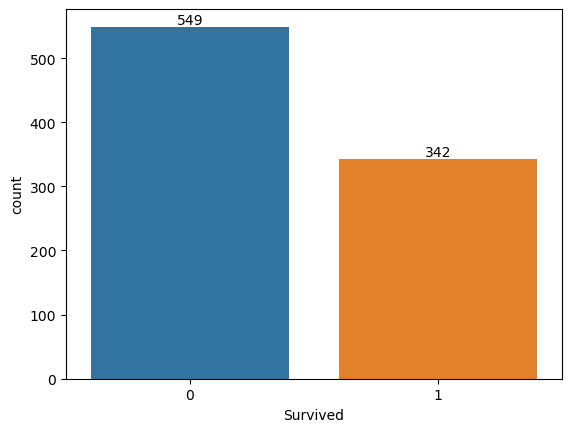

In [27]:
ax =  sns.countplot(x="Survived", data=titanic)
for container in ax.containers:
    ax.bar_label(container)

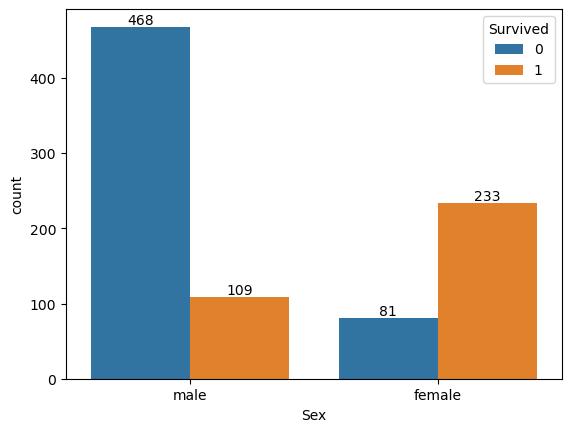

In [26]:
# Del dataset del Titanic volem saber la quantiat de sobrevivents i no sobrevivents categoritzats per sexe
ax =  sns.countplot(x="Sex", hue="Survived", data=titanic)
for container in ax.containers:
    ax.bar_label(container)

A partir de Matplotlib 3.4.0 podem accedir a les barres mitjançant *matplotlib Axes* ja que la funció retorn aun objecte Axes amb el gràfic dibuixat al damunt.
I per tant podem accedir a tots els mètodes d'aquest objecte. En aquest cas el `bar_label()`. 

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html


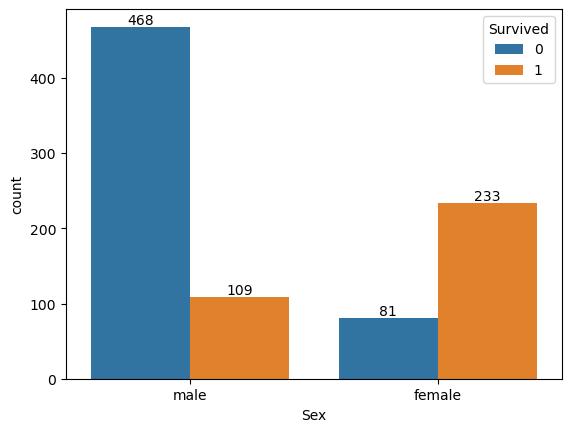

In [6]:
# Del dataset del Titanic volem mostra el gràfic anterior, però mostrar el valor al damunt de cada barra
ax = sns.countplot(x="Sex", hue="Survived", data=titanic)

#ax.containers és un array per cada tonalitat/color (hue)
#ax.containers[0] És el valor de Survived=0
#ax.containers[1] És el valor de Survived=1
# Si volguessim posar etiquetes a les barres hauríem de preparar un llista de valors per cada conjunt de barres.
# Per exemple en aquest cas 
#     ax.bar_label(ax.containers[0],labels=['a','b'])
#     ax.bar_label(ax.containers[1],labels=['1','2'])
# per cada BarContainer 
for container in ax.containers:
    ax.bar_label(container)
    

## BarPlot

https://seaborn.pydata.org/generated/seaborn.barplot.html

El gràfic de barres representa una variable numèrica on l'alçada de cada barra és per defecte la *mitjana* dels valors de les observacions. Això es pot canviar mitjançant el paràmetre estimator {mean,sum,count,...}

Per defecte proporciona una indicació de la incertesa al voltant d'aquesta estimació mitjançant barres d'error. Aquesta barra es pot treure assignant `None` al paràmetre `errorbar`


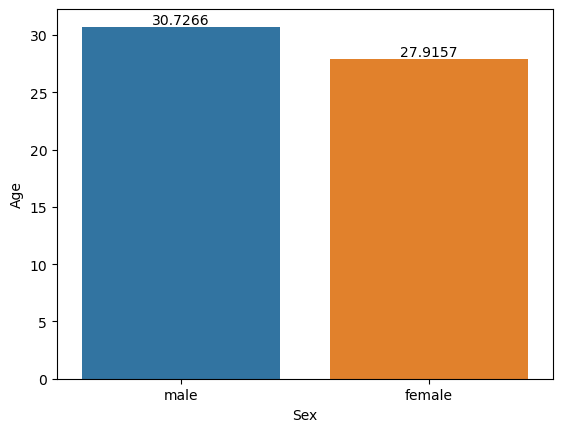

In [4]:
# Mostrar un gràfic de barres de les edats per sexe
ax= sns.barplot(x="Sex", y="Age", data=titanic, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)

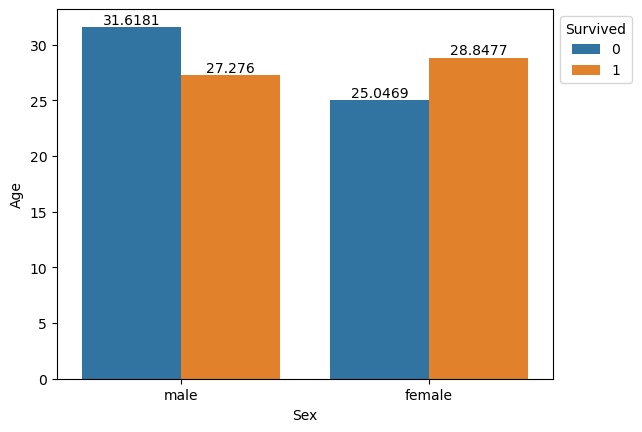

In [8]:
# En el gràfic anterior podem dividr-lo en supervivents i no supervivents.
ax= sns.barplot(x="Sex", y="Age", data=titanic, hue="Survived", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

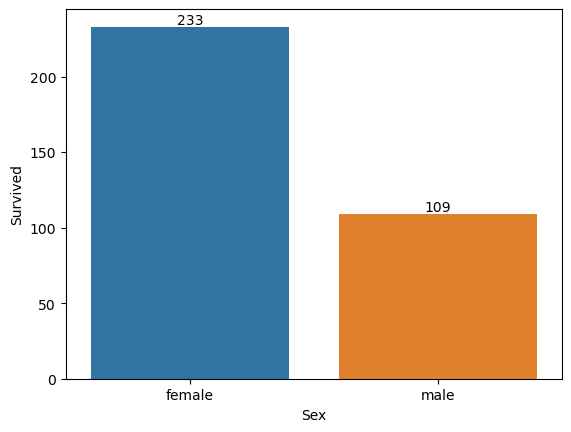

In [20]:
# Obtenir la quantiat de supervivents per cada sexe. Ordena les barres ("female","male")
ax=sns.barplot(x='Sex', y="Survived", order=["female","male"], data=titanic, estimator="sum", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)

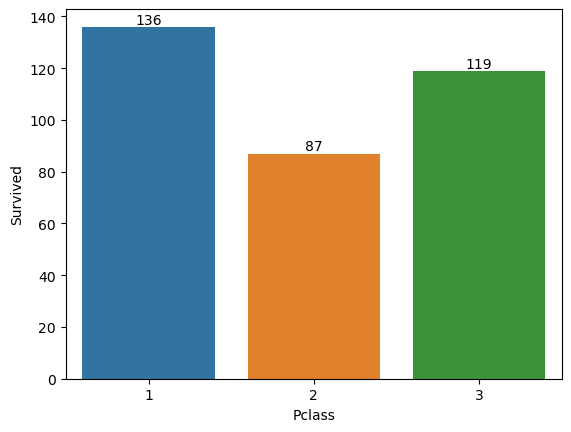

In [22]:
# Mostrar un gràfic de barres de la quantiat de sobrevivents per cada classe
ax = sns.barplot(x="Pclass", y="Survived", data=titanic, estimator="sum", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)

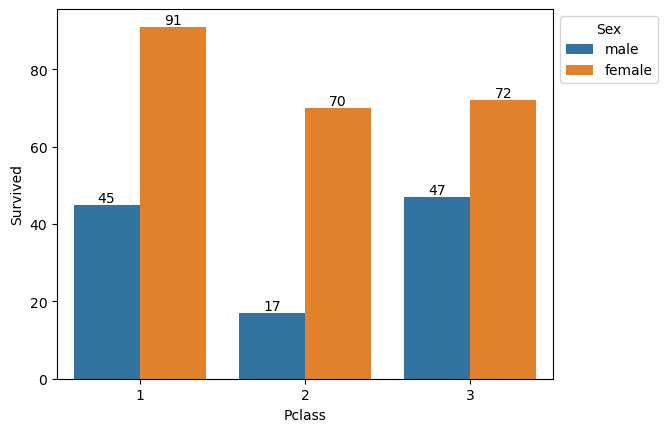

In [25]:
# Mostrar un gràfic de barres de la quantiat de sobrevivents per cada classe i sexe
ax = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic, estimator="sum", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))    

## ViolinPlot

https://seaborn.pydata.org/generated/seaborn.violinplot.html

El gràfic de violí oferix un paper similiar al boxplot. Mostra la distribuació de dades quantitatives en diversos nivells d'una o més variables categòriques de manera que aquestes distribucions es puguin comparar.
A diferència del boxplot, en què tots els components corresponen a punts de dades reals, el violí presenta una estimació de densitat del nucli de la distribució.

En el següent exemple el gràfic de violí ofereix un resum de la franja d'edat dels homes, dones que es van salvar:
* Bé per als nens (masculí).
* Alt per a dones d'entre 20 i 50 anys.
* Menys per als homes a mesura que augmenta l'edat.

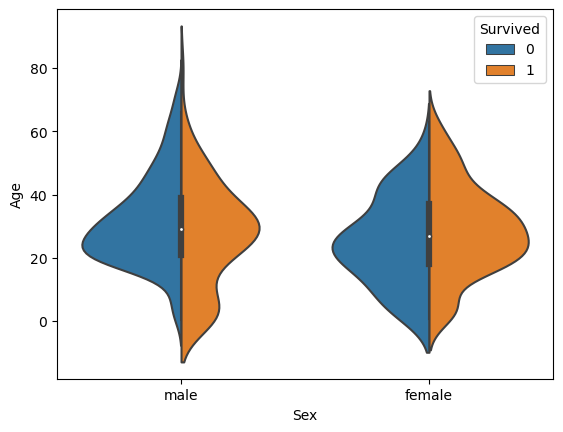

In [29]:
ax = sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)

## Boxplot

El gràfic de caixa i bigotis mostra com es distribueixen les dades. Generalment s'inclouen cinc peces d'informació al gràfic

* El mínim es mostra a l'extrem esquerre del gràfic, al final del "bigotis" esquerre
* El primer quartil, Q1, és l'extrem esquerre del quadre (bigotis esquerre)
* La mediana es mostra com una línia al centre del quadre
* Tercer quartil, Q3, que es mostra a l'extrem dret del quadre (bigotis dret)
* El màxim es troba a l'extrem dret del quadre

<img align="center" src="img/boxplot_1.png" alt="boxplot 1"/>
<img align="center" src="img/boxplot_2.png" alt="boxplot 2"/>

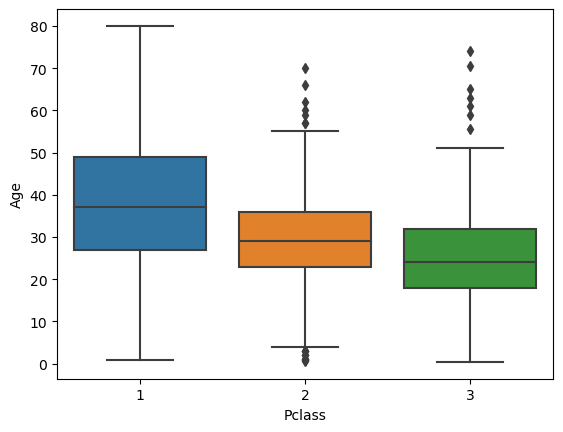

In [33]:
ax = sns.boxplot(x="Pclass",y="Age", data=titanic)

In [82]:
titanic_desc = titanic.groupby(['Pclass'])['Age'].describe()
titanic_desc

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [3]:
people = pd.DataFrame ({
    'name' :['Ann','Brandon','Chen','David','Emily','Farook',
          'Gagan','Hamish','Imran','Julio','Katherine','Lily']
    ,'age' :[21,12,32,45,37,18,28,52,5,40,48,15]
    ,'weight' : [55,35,77,68,70,60,72,69,18,65,82,48]
    ,'height' : [160,135,170,165,173,168,175,159,105,171,155,158]
    ,'sex':['M','M','M','M','F','F','F','M','M','M','F','F']
})

people

,name,age,weight,height,sex
0,Ann,21,55,160,M
1,Brandon,12,35,135,M
2,Chen,32,77,170,M
3,David,45,68,165,M
4,Emily,37,70,173,F
5,Farook,18,60,168,F
6,Gagan,28,72,175,F
7,Hamish,52,69,159,M
8,Imran,5,18,105,M
9,Julio,40,65,171,M


In [35]:
# Dades descriptives dels Homes
people[people.sex=="M"].describe()

,age,weight,height
count,7.000000,7.000000,7.000000
mean,29.571429,55.285714,152.142857
std,17.520057,21.281559,24.030734
min,5.000000,18.000000,105.000000
25%,16.500000,45.000000,147.000000
50%,32.000000,65.000000,160.000000
75%,42.500000,68.500000,167.500000
max,52.000000,77.000000,171.000000


In [36]:
# Dades descriptives de les Dones
people[people.sex=="F"].describe()

,age,weight,height
count,5.000000,5.000000,5.000000
mean,29.200000,66.400000,165.800000
std,13.627179,12.915107,8.927486
min,15.000000,48.000000,155.000000
25%,18.000000,60.000000,158.000000
50%,28.000000,70.000000,168.000000
75%,37.000000,72.000000,173.000000
max,48.000000,82.000000,175.000000


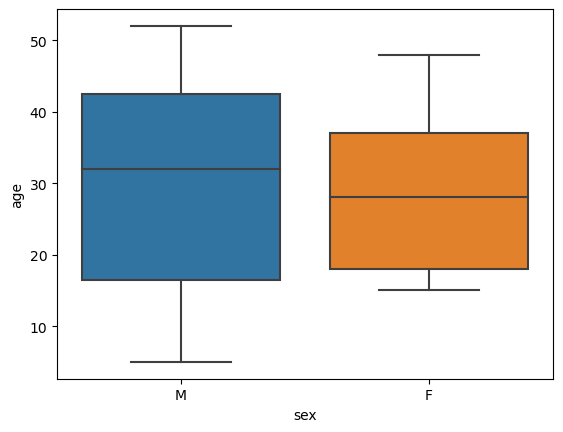

In [46]:
ax = sns.boxplot(x="sex",y="age", data=people)

In [62]:
people_desc = people.groupby(['sex'])['age'].describe()
people_desc

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,5.0,29.200000,13.627179,15.0,18.0,28.0,37.0,48.0
M,7.0,29.571429,17.520057,5.0,16.5,32.0,42.5,52.0


In [61]:
people_desc.loc[:,'mean']

sex
F    29.200000
M    29.571429
Name: mean, dtype: float64

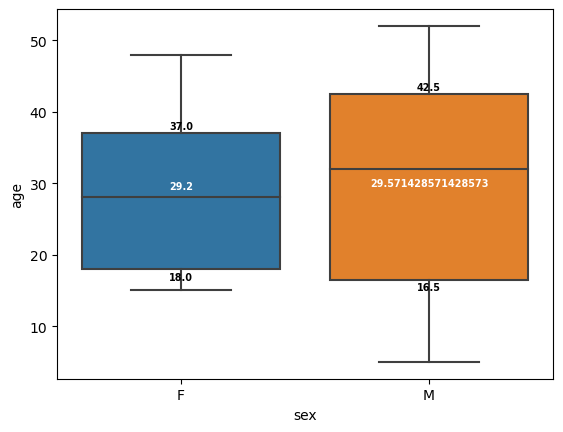

In [81]:
## Si volem afegir els labels

ax = sns.boxplot(x="sex",y="age", data=people, order=["F","M"])

medianes = people_desc.loc[:,'mean']
#medianes = people.groupby(['sex'])['age'].median()

#vertical_offset = people['age'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    # Afegim el percentil 50 (mediana)
    ax.text(xtick,medianes[xtick],
                  medianes[xtick],
                  horizontalalignment='center',
                  size='x-small',
                  color='w',
                  weight='semibold'
                 )
    # Afegim el percentil 75
    ax.text(xtick,people_desc.loc[:,'75%'][xtick]+0.5,
                  people_desc.loc[:,'75%'][xtick],
                  horizontalalignment='center',
                  size='x-small',
                  color='black',
                  weight='semibold'
                 )
    # Afegim el percentil 25
    ax.text(xtick,people_desc.loc[:,'25%'][xtick]-1.5,
                  people_desc.loc[:,'25%'][xtick],
                  horizontalalignment='center',
                  size='x-small',
                  color='black',
                  weight='semibold'
                 )

## HeatMap

https://seaborn.pydata.org/generated/seaborn.heatmap.html

El gàfic de Heat Map el podem utilitzar per mostrar la correlació que hi ha entre diferents variables quantitatives i contínues.

Text(0.5, 1.0, 'Mapa de correlació')

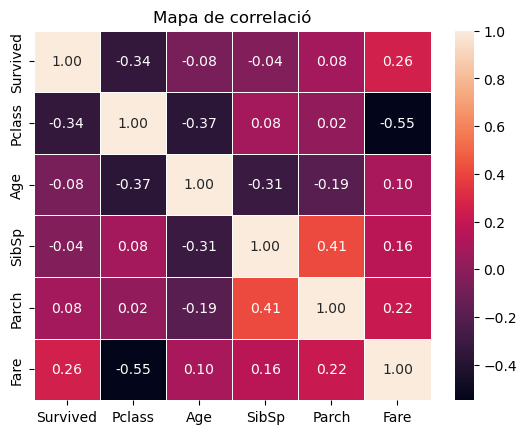

In [18]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
correlacions = titanic[cols].corr()
correlacions

#fig,ax = plt.subplots(figsize=(12,4))
ax = sns.heatmap(correlacions, annot=True, linewidth=0.5, fmt='.2f')
ax.set_title('Mapa de correlació')


Text(0.5, 1.0, 'Gràfic sense valors')

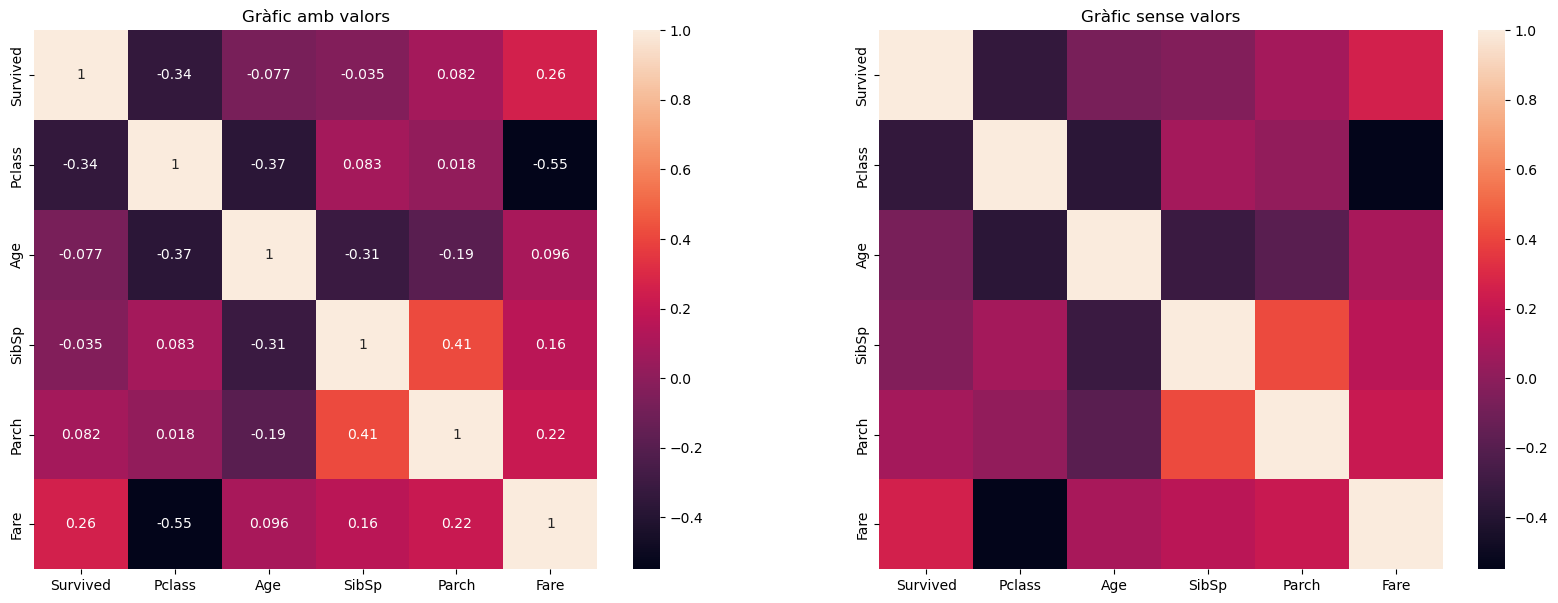

In [28]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,7))
sns.heatmap(correlacions,annot=True,ax=ax1)
sns.heatmap(correlacions,annot=False,ax=ax2)
ax1.set_title('Gràfic amb valors')
ax2.set_title('Gràfic sense valors')

## ScatterPlot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Amb el LinePlot podem veure la relació entre x i y es pot mostrar per a diferents subconjunts de dades utilitzant els paràmetres de to (`hue`), mida(`size`) i estil(`style`). 

<AxesSubplot:xlabel='weight', ylabel='height'>

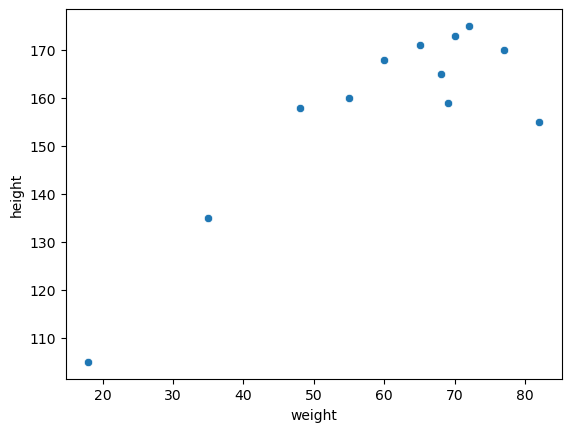

In [5]:
sns.scatterplot(x='weight', y="height", data=people)

## PointPlot

https://seaborn.pydata.org/generated/seaborn.pointplot.html


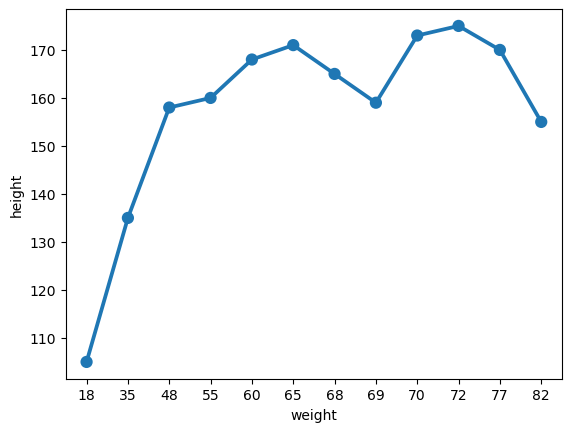

In [26]:
ax = sns.pointplot(x='weight',y='height',data=people)

## LinePlot

https://seaborn.pydata.org/generated/seaborn.lineplot.html

Amb el LinePlot podem veure la relació entre x i y es pot mostrar per a diferents subconjunts de dades utilitzant els paràmetres de to (`hue`), mida(`size`) i estil(`style`). 

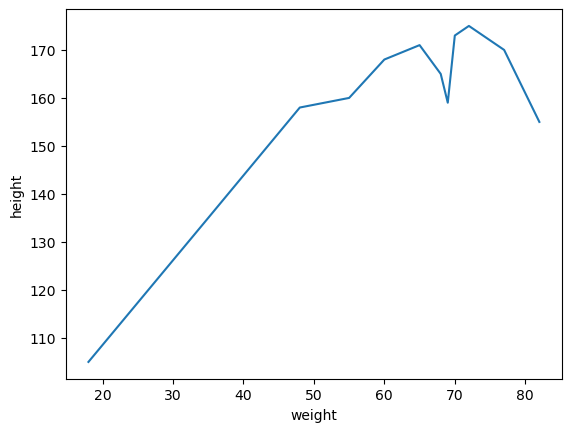

In [15]:
ax = sns.lineplot(x='weight', y="height", data=people)

## KDEPlot

KDE (Kernel Density Estimation) és una manera d'estimar la funció de densitat de probailitat d'una variable contínua.


<AxesSubplot:xlabel='Age', ylabel='Density'>

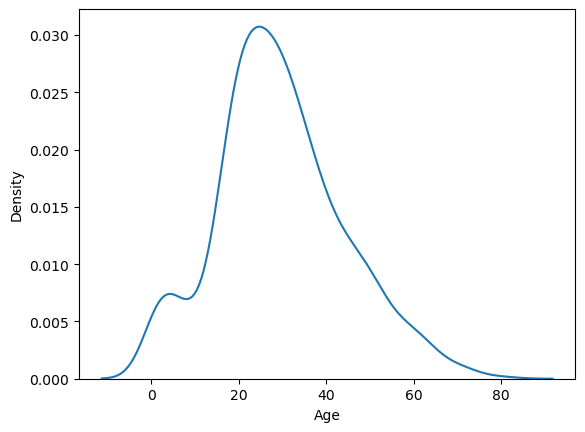

In [14]:
sns.kdeplot(data=titanic, x="Age")

<AxesSubplot:xlabel='Age', ylabel='Density'>

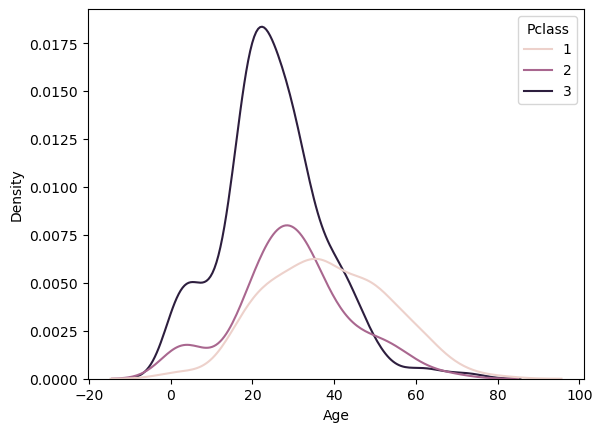

In [15]:
sns.kdeplot(data=titanic, x="Age", hue="Pclass")

## HistPlot

Aquest gràc permet mostrar un histograma. Un histograma és una eina de visualització clàssica per representar la distribució d'una o més variables comptant el nombre d'observacions.

<AxesSubplot:xlabel='Age', ylabel='Count'>

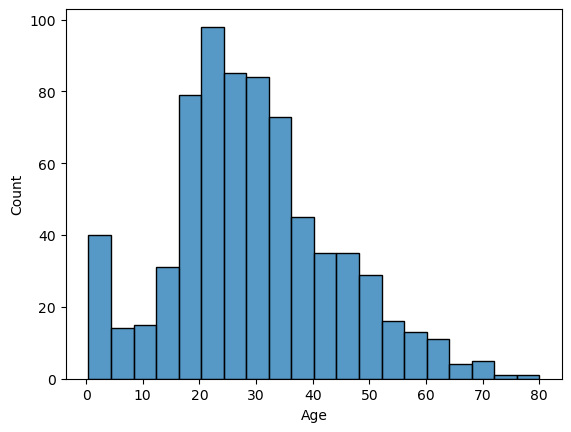

In [20]:
sns.histplot(data=titanic, x="Age")

Per suavitzar l'histograma, proporcionant informació complementària sobre la forma de la distribució podem afegir KDE Plot

<AxesSubplot:xlabel='Age', ylabel='Count'>

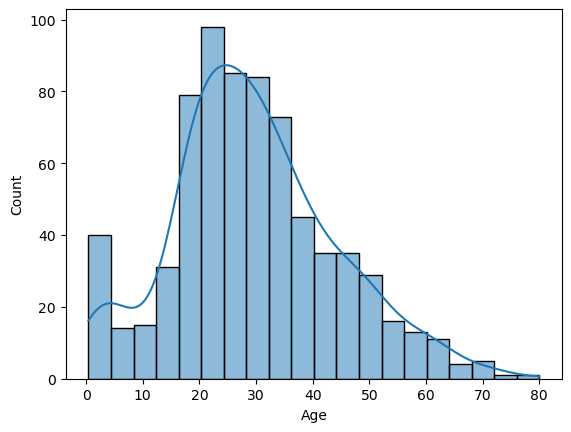

In [16]:
# Podem afegir el KDE al plot de l'histograma
sns.histplot(data=titanic, x="Age", kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

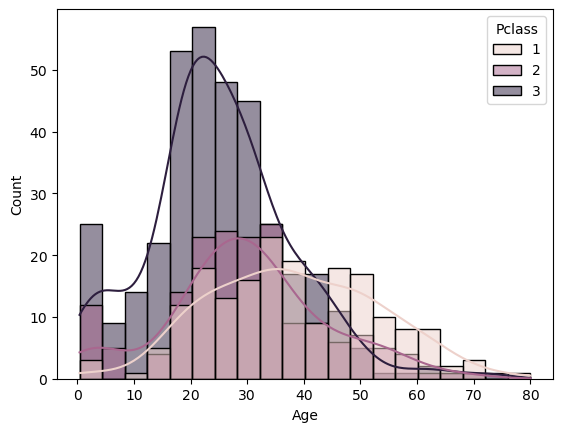

In [19]:
sns.histplot(data=titanic, x="Age", hue="Pclass", kde=True)

## CatPlot

https://seaborn.pydata.org/generated/seaborn.catplot.html

Aquesta funció de gràfic proporciona diferents gràfics:
* Gràfics de dispersió per categoria:
    * stripplot() --> kind="strip"
    * swarmplot() --> kind="swarm"
* Gràfics de distribució per categoria:
    * boxplot() --> kind="box"
    * violinplot() --> kind="violin"
    * boxenplot() --> kind="boxen"
* Gràfics d'estimació categòrica:
    * pointplot() --> kind="point"
    * barplot() --> kind="bar"
    * countplot() --> kind="count"



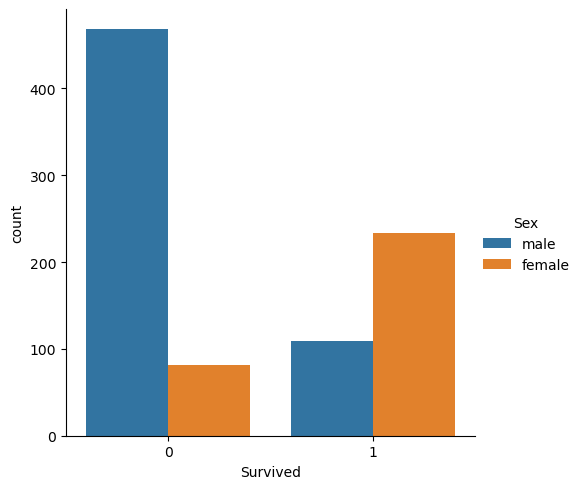

In [28]:
# Edata per classe
ax = sns.catplot(x='Survived', hue='Sex', data=titanic, kind='count')

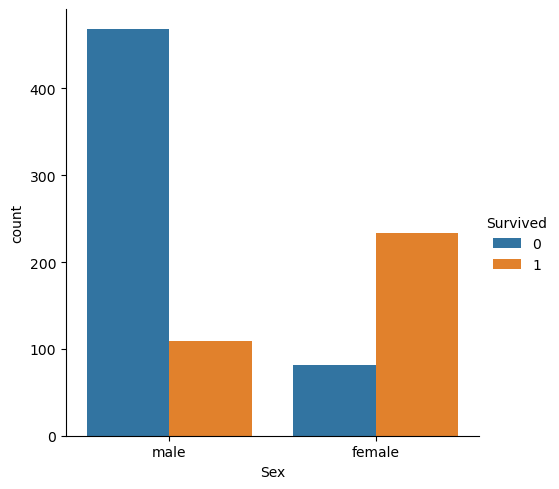

In [29]:
ax= sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = titanic)